# Speech2Text Tutorial
This tutorial uses whisper and pyannote for speech-to-text conversion and diarization.

## Install libraries

In [ ]:
!pip install whisper
!pip install pyannote.audio
!pip install pyannote_whisper
!apt install ffmpeg

!git clone https://github.com/yinruiqing/pyannote-whisper.git
%cd pyannote-whisper
!pip install .

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.8/42.8 kB 1.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for whisper: filename=whisper-1.1.10-py3-none-any.whl size=41120 sha256=e60c8479bf6863097256f4940163357c2ec791ed0a6ff22c69341b96a107c379
  Stored in directory: /root/.cache/pip/wheels/aa/7c/1d/015619716e2facae6631312503baf3c3220e6a9a3508cb14b6
Successfully built whisper
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 200.2/200.2 kB 5.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.6/44.6 kB 5.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 302.0/302.0 kB 12.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 20.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.5/79.5 kB 12.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 153.4/153.4 MB 8.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.5/58.5 kB 8.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━

ERROR: Could not find a version that satisfies the requirement pyannote_whisper (from versions: none)
ERROR: No matching distribution found for pyannote_whisper
Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
ffmpeg is already the newest version (7:4.4.2-0ubuntu0.22.04.1).
0 upgraded, 0 newly installed, 0 to remove and 18 not upgraded.
Cloning into 'pyannote-whisper'...
remote: Enumerating objects: 72, done.
remote: Counting objects: 100% (24/24), done.
remote: Compressing objects: 100% (9/9), done.
remote: Total 72 (delta 19), reused 15 (delta 15), pack-reused 48
Receiving objects: 100% (72/72), 3.41 MiB | 7.45 MiB/s, done.
Resolving deltas: 100% (25/25), done.
/content/pyannote-whisper
Processing /content/pyannote-whisper
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 794.3/794.3 kB 9.3 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Prep

In [ ]:
import whisper
import os
import csv
from pyannote.audio import Pipeline
from pyannote_whisper.utils import diarize_text
from pyannote.core import Segment, notebook
# from pyannote.audio import Audio
# from pydub import AudioSegment
import torch
from google.colab import drive
import google.colab



In [ ]:
# Mount Google Drive for file access
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:

# upload using widget
audio_file = list(google.colab.files.upload())[0]


Saving Horizon_Kleureneconomie.mp3 to Horizon_Kleureneconomie.mp3


In [ ]:
# if already uploaded choose:
audio_file = '/content/drive/MyDrive/Research/whisper/Horizon_Kleureneconomie.mp3'

In [ ]:
# sample = '/content/drive/MyDrive/Research/whisper/Horizon_Kleureneconomie.mp3'
# convert_mp3_to_wav(sample, '/content/drive/MyDrive/Research/whisper/test.wav')
# audio_file = '/content/drive/MyDrive/Research/whisper/test.wav'

## Load Diarization Pipeline
You need a Hugging Face token to be able to access the models provided by PyAnnote.

For offline use see: https://github.com/pyannote/pyannote-audio/blob/develop/tutorials/applying_a_pipeline.ipynb

In [ ]:
token = "" #please fill out Hugging Face token here

In [ ]:
diarization_pipeline = Pipeline.from_pretrained("pyannote/speaker-diarization-3.0",
                                    use_auth_token=token)
diarization_pipeline.to(torch.device("cuda"))

(…)diarization-3.0/resolve/main/config.yaml:   0%|          | 0.00/467 [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/5.91M [00:00<?, ?B/s]

(…)egmentation-3.0/resolve/main/config.yaml:   0%|          | 0.00/399 [00:00<?, ?B/s]

speaker-embedding.onnx:   0%|          | 0.00/26.5M [00:00<?, ?B/s]

## Load Whisper Model
Model types include:

|  Size  | Parameters | English-only model | Multilingual model | Required VRAM | Relative speed |
|:------:|:----------:|:------------------:|:------------------:|:-------------:|:--------------:|
|  tiny  |    39 M    |     `tiny.en`      |       `tiny`       |     ~1 GB     |      ~32x      |
|  base  |    74 M    |     `base.en`      |       `base`       |     ~1 GB     |      ~16x      |
| small  |   244 M    |     `small.en`     |      `small`       |     ~2 GB     |      ~6x       |
| medium |   769 M    |    `medium.en`     |      `medium`      |     ~5 GB     |      ~2x       |
| large  |   1550 M   |        N/A         |      `large`       |    ~10 GB     |       1x       |

In [ ]:
model = whisper.load_model("tiny")
model.to(torch.device("cuda")); # send model to GPU

100%|█████████████████████████████████████| 72.1M/72.1M [00:01<00:00, 53.8MiB/s]


## Inference

In [ ]:
## speech-to-text using Whisper
asr_result = model.transcribe(audio_file)

## diarization using PyAnnote
diarization_result = diarization_pipeline(audio_file, num_speakers=2, min_speakers=2, max_speakers=2) #fill out n_speakers is known

## Print results

In [ ]:
final_result = diarize_text(asr_result, diarization_result)

for seg, spk, sent in final_result:
    line = f'{seg.start:.2f} {seg.end:.2f} {spk} {sent}'
    print(line)

0.00 2.48 SPEAKER_00  Hoorizoen over kleuren economie.
2.48 6.48 SPEAKER_00  Welkom bij Hoorizoen het audio-maker zien van de Oordio-n-webbox.
6.48 9.16 SPEAKER_00  Waarie voeten we het alles over kleuren economie?
9.16 13.44 SPEAKER_01  De kleurreken is een soort ander geldtjes stemen.
13.44 18.36 SPEAKER_01  We werken nu met euro's en dat vond ik eigenlijk niet goed genoeg.
18.36 22.76 SPEAKER_01  Het is niet een heel verindelijk zeg maar het is niet eerlijk te zijn.
22.76 24.64 SPEAKER_01  Alle aremen hier sport, we hebben niet.
24.64 28.04 SPEAKER_01  Dit is een ander system, wat ik daarvoor in de plek heb bedacht.
28.04 31.00 SPEAKER_01  En hoe ben je zo op dat die tegenkomen?
31.00 35.76 SPEAKER_01  Nou, we waren met een groep jongen gebezen met de Agenda 21, in jaar of 10 geleden.
35.76 39.20 SPEAKER_01  En zo'n de vegetalnaaties plan ook om de planeten gereden.
39.20 43.20 SPEAKER_01  Die hadden gezegd we vreden naarties van nou het lukt ons niet.
43.20 44.84 SPEAKER_01  De moe

## Visualize Results

In [ ]:
notebook.reset()
notebook.crop = Segment(0, 260) # just show the first minute
## Here I set the labels for the speakers
diarization_result = diarization_result.rename_labels({"SPEAKER_00": "Interviewer", "SPEAKER_01": "Piet"})

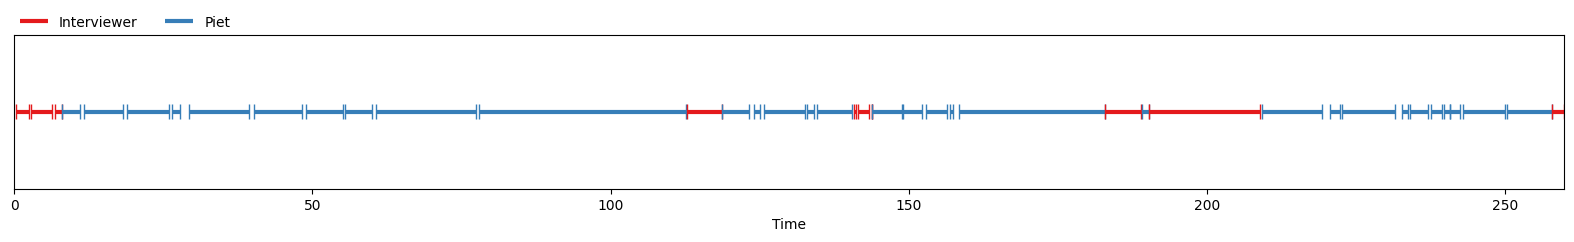

In [ ]:
diarization_result

In [ ]:
cleaned_output = []
for seg, spk, sent in final_result:
    line = f'{seg.start:.2f} {seg.end:.2f} {spk} {sent}'
    cleaned_output.append(sent)

In [ ]:
cleaned_output

[' Horizon over kleur en economie. Welkom bij Horizon, het audiomegelsin van de Oudeon-webbox. Wari Voeten weet alles over kleureconomie.',
 " De kleureconomie is een soort andere geldsysteem. We werken nu met euro's en dat vond ik eigenlijk niet goed genoeg. Het is niet heuverienelijk, zeg maar.",
 ' Het is niet eerlijk. Het is allerlei manieren, sport eigenlijk niet. En dit is een ander systeem wat ik daarvoor in het plek heb bedacht.',
 " En hoe ben je zo op het idee gekomen? Nou, we waren met een groep jongeren bezig met de agenda 21, een jaar of tien geleden. En zo'n verenigde naziesplan ook om eigenlijk om de planeet te redden. En die hadden gezegd, verenigde nazies van nou, het lukt ons niet. De moeder gemeentes moeten er maar gaan doen. En toen werden die jongeren eigenlijk, jongeren aangewezen om dat op te gaan knappen. En zo zijn we op het idee gekomen om echt goed nadenken en anderhalf jaar nadenken zo.",
 ' En een heel lange proces was dat eigenlijk om op dat idee te komen.

## Output to CSV


In [ ]:
output_path = '/content/drive/MyDrive/Research/whisper/'
filename = 'output.csv'

with open(os.path.join(output_path, filename), 'w', newline='') as csvfile:
    writer = csv.writer(csvfile)
    writer.writerow(['Segment', 'Speaker', 'Text'])
    for row in final_result:
        writer.writerow(row)
